# Data Challenge 7 — Evaluating SLR, Assumptions, & the Bias–Variance Tradeoff

**Goal:** Fit a simple linear regression (SLR) with a **train–test split**, report **MAE/RMSE** on *unseen* data, and use **training residuals** to check assumptions. Explain **bias vs. variance** in plain English.


> Dataset: **NYC Yellow Taxi — Dec 2023** (CSV). Keep code *simple* — minimal coercion for chosen columns only.

## We Do — Instructor Session (20 mins)
Use this **step-by-step plan** to guide students. Keep it high-level; they will implement in the *You Do* section.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- MAE / MSE / RMSE — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- OLS (fit/predict/residuals) — statsmodels: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
- OLS Results (attributes like `resid`, `fittedvalues`, `summary`) — statsmodels: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html
- Q–Q plot — SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

### Pseudocode Plan
1) **Load CSV** → preview columns/shape.
2) **Assign Y and X (one predictor)** → pick numeric columns that matter; if needed, coerce **just** these to numeric and drop NAs.
3) **Add intercept** → `X = add_constant(X)`.
4) **Train–test split (80/20)** → `X_train, X_test, y_train, y_test = train_test_split(...)` (set `random_state`).
5) **Fit on TRAIN** → `model = OLS(y_train, X_train).fit()`.
6) **Predict on TEST** → `y_pred = model.predict(X_test)`.
7) **Evaluate on TEST** → compute **MAE** and **RMSE** using `y_test` & `y_pred`; speak in **units of Y**.
8) **Diagnostics on TRAIN** → use `model.resid` & `model.fittedvalues` for residuals vs fitted; Q–Q plot; check Durbin–Watson in `model.summary()`.
9) **Bias–variance read (optional)** → compare train vs test errors.
10) **Stakeholder one-liner** → MAE/RMSE in units + brief reliability note.


## You Do — Student Section
Work in pairs. Keep code simple and comment your choices.

### Step 0 — Setup & Imports

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats


### Step 1 & 2 — Read in the file and Choose **Y** (target) and **X** (one predictor)
- Keep them numeric and present in your CSV.

**Hint: You may have to drop missing values and do a force coercion to make sure the variables stay numeric (other coding assignments may help)**

In [ ]:

df = pd.read_csv('/Users/Marcy_Student/DA2025_Lectures/Mod6/data/2023_Yellow_Taxi_Trip_Data_20251015.csv')


Y = "fare_amount"
X = "trip_distance"


df2 = df[[Y, X]].copy()


df2[Y] = pd.to_numeric(df_small[Y], errors="coerce")
df2[X] = pd.to_numeric(df_small[X], errors="coerce")


df2 = df2.dropna()


Y = df2[Y]
X = df2[[X]]


/var/folders/_z/410cfm6x4fl_4m_6s41fnf4w0000gp/T/ipykernel_46192/1236251765.py:2: DtypeWarning: Columns (4,10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Marcy_Student/DA2025_Lectures/Mod6/data/2023_Yellow_Taxi_Trip_Data_20251015.csv')


### Step 3 — Train–Test Split (80/20 random split for practice)

In [24]:

X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42
)


### Step 4 — Fit on TRAIN only; Evaluate on TEST
Compute **MAE** and **RMSE** in the **units of Y**.

In [25]:

model = sm.OLS(y_train, X_train).fit()

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("MSE:", mse)
print()
print(model.summary())


MAE: 4.72413866153538
MSE: 10.60993532915812

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 4.914e+06
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:25:36   Log-Likelihood:            -1.0149e+07
No. Observations:             2648696   AIC:                         2.030e+07
Df Residuals:                 2648694   BIC:                         2.030e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------


### Step 5 — Diagnostic Plots (TRAIN residuals)
Check regression assumptions using **training** residuals.
- **Homoscedasticity:** random cloud around 0 (no cone).
- **Normality:** Q–Q plot ~ diagonal.

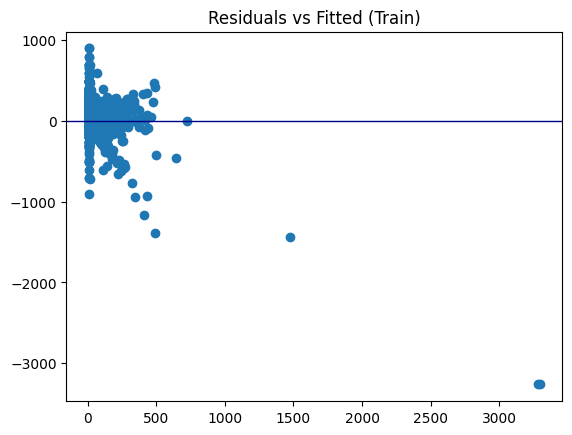

In [26]:
residuals = model.resid
fitted = model.fittedvalues


plt.scatter(fitted, residuals)
plt.axhline(0, color="darkblue", linewidth=1)
plt.title("Residuals vs Fitted (Train)")
plt.show()


### Step 6 — Quick Bias–Variance Read (optional)
Compare **train** and **test** errors and describe what you see.

In [28]:

predict = model.predict(X_train)
train_mae = mean_absolute_error(y_train, predict)
train_mse = np.sqrt(mean_squared_error(y_train, predict))

print("Training MAE:", train_mae)
print("Training RMSE:", train_mse)
print("Test MAE:", mae)
print("Test RMSE:", mse)


Training MAE: 4.751705312077627
Training RMSE: 11.162631325978875
Test MAE: 4.72413866153538
Test RMSE: 10.60993532915812


## We Share — Reflection & Wrap‑Up
Write **1–2 short paragraphs** addressing:


1) **Is this model good enough** for a real decision **right now**? Why/why not?
Refer to **MAE/RMSE in units**, any **assumption issues**, and whether accuracy meets a reasonable business threshold.


2) **What’s your next move** to improve trust/accuracy?
Examples: adopt a **time‑aware split**, try a more relevant **X**, transform variables, segment checks (hour/zone), or move to **Multiple Linear Regression** with validation.


# #1
Based on the MAE and RMSE values, the model is only somewhat reliable. The errors show that the predictions can still be off by a noticeable amount in the units of the target, which could matter depending on how precise the business needs to be. The residual plots also show whether the linear pattern holds or not, and if the assumptions are shaky, then the model might not be stable in real use. Because of that, I would not fully trust this version of the model for an important decision yet.

# #2
The next step would be to try features that make more sense for predicting the target, or move to a multiple linear regression so the model is not relying on one variable. It would also help to use a time-aware split so we are not mixing information from different parts of the month. Transforming variables or breaking the data into groups like hour or zone could reveal better patterns too. Overall, I would treat this simple model as a starting point and then build something stronger before depending on it.